# **Clasificador de Imágenes - Animales**

## **Descripción General**

El presente modelo busca realizar una clasificación de Imágenes respecto a un dataset ya existente. El dataset corresponde a Animales y se poseen 10 tipos de animales, con una cantidad de 28K de datos.


## **Objetivos**



Se desea Implementar un clasificador de Imágenes en Python utilizando la plataforma de Google Colab, para ello se busca lo siguiente:

*   Mejora de precisión: Incrementar la precisión del modelo en la clasificación de animales, reduciendo la tasa de errores.
* Generalización: Asegurar que el modelo pueda generalizar bien en datos no vistos, evitando el sobreajuste a los datos de entrenamiento.
* Eficiencia computacional: Optimizar el rendimiento del modelo para que pueda procesar imágenes de forma más rápida y eficiente, especialmente en entornos con recursos limitados.



## **Alcances**



*  Optimización de hiperparámetros: Realizar una búsqueda sistemática de los hiperparámetros del modelo, como la tasa de aprendizaje, el tamaño del lote y la regularización, para encontrar la configuración óptima que maximice el rendimiento del modelo en términos de precisión y generalización.
* Regularización: Implementar técnicas de regularización, como la disminución de la tasa de aprendizaje, la regularización L1/L2 y la deserción (dropout), para evitar el sobreajuste y mejorar la capacidad del modelo para generalizar en datos nuevos.
* Optimización del rendimiento: Implementar técnicas de optimización del rendimiento, como la paralelización del cómputo y el uso de aceleradores de hardware (por ejemplo, GPU), para mejorar la eficiencia computacional del modelo y reducir los tiempos de entrenamiento e inferencia.



## **Mejoras a Implementar**

Para mejorar la exactitud del modelo al trabajar con los datos (Imagenes), se implementarán las siguientes mejoras:



*   **Ajuste de Hiperparametros**
  * **Learning Rate**:
No se realizó un ajuste explícito del learning rate en este código. Sin embargo, se utilizó el optimizador RMSprop con una tasa de aprendizaje predeterminada de 0.001.
  * **Cantidad de Capas (CNN)**
Se definió una arquitectura de red con dos capas convolucionales seguidas de max pooling y dos capas densas para la clasificación.
  * **Función de Activación**
Se utilizó la función de activación ReLU en las capas convolucionales y densas, ya que es comúnmente utilizada en arquitecturas de redes neuronales convolucionales debido a su capacidad para manejar el problema de desvanecimiento del gradiente y acelerar el entrenamiento.
*   **Preprocesamiento**
  * **Normalización**
Se normalizaron los datos dividiendo los valores de píxeles de las imágenes por 255.0, lo que escala los valores de los píxeles al rango [0, 1]. Esto ayuda a estandarizar los datos y acelerar el entrenamiento del modelo.
  * **Cargar Incremental **
Para manejar grandes conjuntos de datos de manera eficiente, se implementó la carga incremental dividiendo los datos en lotes más pequeños durante el entrenamiento del modelo. Esto se logró al cargar y mezclar los datos por lotes en lugar de cargar todo el conjunto de datos en la memoria al mismo tiempo.
*   **Regularización y Reducción de Overfitting**
  * **Dropout**
Se aplicó Dropout con una tasa de 0.5 en la capa densa para reducir el sobreajuste. Dropout apaga aleatoriamente un porcentaje de unidades durante el entrenamiento, lo que ayuda a prevenir que la red se vuelva demasiado dependiente de ciertas características y mejora su capacidad de generalización.
  * **Batch Normalization**
Se añadieron capas de BatchNormalization para normalizar las activaciones de cada capa en la red. Esto ayuda a estabilizar y acelerar el entrenamiento de la red al reducir la covariable interna entre las capas, y puede actuar como una forma de regularización para prevenir el sobreajuste.



## **Caso de Uso**

### **Adecuación Ambiente de Trabajo**

A continuación, se realiza la importación de las librerías y herramientas necesarias para el desarrollo del proyecto. Entre ellas se encuentran numpy para manipulación de matrices y arreglos, matplotlib.pyplot para visualización de datos, cv2 para procesamiento de imágenes, os para manipulación de archivos y directorios, zipfile para trabajar con archivos zip, google.colab.drive para montar Google Drive, train_test_split de sklearn.model_selection para dividir los datos en conjuntos de entrenamiento y prueba, shuffle de sklearn.utils para barajar los datos, y varias clases y funciones de TensorFlow.keras para construir y entrenar modelos de redes neuronales convolucionales. Estas incluyen Sequential para definir modelos secuenciales, capas como Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization para construir la arquitectura de la red, Adam para el optimizador, l2 para regularización L2 y ImageDataGenerator para aumentar los datos durante el entrenamiento.

In [ ]:
#Definición de Librerías y Herramientas a Utilizar
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import zipfile
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Recomendación: Reemplazar la dirección del .zip con la correspondiente ubicación de su Archivo

In [ ]:
# Ruta al archivo .zip en Google Drive
zip_file_path = "/content/drive/MyDrive/animals10.zip"

In [ ]:
# Directorio de destino para la extracción
extract_dir = "/content/drive/MyDrive/animals10"

In [ ]:
# Descomprimir el archivo .zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [ ]:
# Verificar si la extracción fue exitosa mostrando los archivos en el directorio de extracción
print("Archivos extraídos:")
print(os.listdir(extract_dir))

Archivos extraídos:
['translate.py', 'raw-img']


La siguiente función, "*load_and_preprocess_data*" se utiliza para cargar y preprocesar imágenes de un directorio de conjunto de datos. Itera sobre cada categoría en el directorio, carga cada imagen, la convierte a formato RGB, la redimensiona al tamaño especificado y la agrega al conjunto de datos junto con su etiqueta correspondiente. Si se produce algún error durante el proceso de carga, se maneja y se imprime un mensaje de error. Finalmente, la función devuelve los datos preprocesados en forma de matrices numpy.

In [ ]:
# Función para cargar y preprocesar las imágenes
def load_and_preprocess_data(dataset_dir, image_size=(100, 100)):
    data = []
    labels = []
    categories = os.listdir(dataset_dir)
    for category in categories:
        path = os.path.join(dataset_dir, category)
        label = categories.index(category)
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, image_size)
                data.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error loading image: {img_path}, {e}")
    return np.array(data), np.array(labels)

In [ ]:
# Directorio del conjunto de datos en Google Drive
drive_dataset_dir = "/content/drive/MyDrive/Universidad/2024/Semestre 1/Inteligencia Artificial/animals10/raw-img"

In [ ]:
# Cargar y preprocesar los datos
X, y = load_and_preprocess_data(drive_dataset_dir)

In [ ]:
# Normalizar los datos
X = X / 255.0

La siguiente función, "*data_generator*" se utiliza para generar lotes de datos de manera incremental a partir de matrices de datos X e y. Toma como entrada las matrices de datos, el tamaño del lote, y el tamaño del conjunto de prueba. Divide las muestras en conjuntos de entrenamiento y prueba según el tamaño especificado, y luego crea generadores de datos para estos conjuntos. Los generadores producen lotes de datos normalizados y sus etiquetas correspondientes cada vez que se les llama, lo que permite un entrenamiento eficiente de modelos de aprendizaje profundo con grandes conjuntos de datos.

In [ ]:
def data_generator(X, y, batch_size, test_size):
    num_samples = len(X)
    num_train_samples = int(num_samples * (1 - test_size))
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    train_indices = indices[:num_train_samples]
    test_indices = indices[num_train_samples:]

    def generate_data(indices):
        while True:
            np.random.shuffle(indices)
            for i in range(0, len(indices), batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]
                X_preprocessed = X_batch / 255.0  # Normalizar los datos
                yield X_preprocessed, y_batch

    train_generator = generate_data(train_indices)
    test_generator = generate_data(test_indices)
    return train_generator, test_generator

In [ ]:
# Definir el tamaño del lote para el generador de datos
batch_size = 32
test_size = 0.15

In [ ]:
# Crear generadores de datos para el conjunto de entrenamiento y prueba
train_generator, test_generator = data_generator(X, y, batch_size, test_size)

Se ha definido un modelo de red neuronal convolucional (CNN) más profundo utilizando la arquitectura Sequential de Keras. Este modelo consta de múltiples capas convolucionales y de pooling, intercaladas con capas de regularización y normalización para mejorar la estabilidad y la capacidad de generalización. Comienza con una capa convolucional de 32 filtros seguida de BatchNormalization para normalizar las activaciones. Luego, se añade otra capa convolucional de 64 filtros, seguida de MaxPooling para reducir la dimensionalidad. Se aplican capas de Dropout para mitigar el sobreajuste. La red se profundiza aún más con capas convolucionales de 128 y 256 filtros, seguidas de MaxPooling. Finalmente, se agregan capas densas para la clasificación, con activación ReLU y BatchNormalization para estabilizar el entrenamiento. La capa de salida utiliza la función de activación softmax para clasificar las entradas en 10 categorías diferentes. Este modelo más profundo busca capturar características más complejas y abstracciones en los datos para mejorar el rendimiento en la tarea de clasificación.

In [ ]:
# Definir el modelo de la red neuronal convolucional (CNN) más profundo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 98, 98, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 48, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       7

In [ ]:
# Compilar el modelo con el optimizador RMSprop y regularización L2
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import regularizers

En las siguientes lineas, se define que se está utilizando el optimizador RMSprop con una tasa de aprendizaje de 0.001.
De la misma manera, se está utilizando la entropía cruzada categórica dispersa, que es adecuada para problemas de clasificación con múltiples clases donde las etiquetas son enteros.
Se define como métricas la exactitud en que tan bien el modelo está trabajando cada uno de los datos.

In [ ]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

En el siguiente apartado, se generará la matriz de confusión basada en las predicciones del modelo y las etiquetas verdaderas del conjunto de prueba. Permite visualizar de manera clara cómo se están clasificando las diferentes clases y dónde se están produciendo errores en la clasificación.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obtener las predicciones del modelo
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Para lograr el entrenamiento, se han definido 30 epocs, con la finalidad de precisar los resultados entre la epoc 25 y 30.

In [ ]:
# Entrenar el modelo utilizando los generadores de datos
history = model.fit(train_generator,
                    steps_per_epoch=len(X) * (1 - test_size) // batch_size,
                    epochs=30,
                    validation_data=test_generator,
                    validation_steps=len(X) * test_size // batch_size)

Epoch 1/30
547/547 [==============================] - 44s 68ms/step - loss: 1.8020 - accuracy: 0.3863 - val_loss: 3.1432 - val_accuracy: 0.1393
Epoch 2/30
547/547 [==============================] - 38s 68ms/step - loss: 1.3745 - accuracy: 0.5205 - val_loss: 199.3843 - val_accuracy: 0.0000e+00
Epoch 3/30
547/547 [==============================] - 38s 69ms/step - loss: 1.2292 - accuracy: 0.5762 - val_loss: 40.0196 - val_accuracy: 0.1063
Epoch 4/30
547/547 [==============================] - 38s 70ms/step - loss: 1.1191 - accuracy: 0.6167 - val_loss: 46.5138 - val_accuracy: 0.0523
Epoch 5/30
547/547 [==============================] - 38s 69ms/step - loss: 0.9915 - accuracy: 0.6593 - val_loss: 36.3039 - val_accuracy: 0.1105
Epoch 6/30
547/547 [==============================] - 38s 70ms/step - loss: 0.8630 - accuracy: 0.7041 - val_loss: 1232.8363 - val_accuracy: 0.0801
Epoch 7/30
547/547 [==============================] - 39s 71ms/step - loss: 0.7310 - accuracy: 0.7480 - val_loss: 12.9090 - 

In [ ]:
# Guardar el modelo entrenado
model.save('"/content/drive/MyDrive/Universidad/2024/Semestre 1/Inteligencia Artificial/animals10/modelo_entrenado.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Se han generado gráficos para visualizar el rendimiento del modelo durante el entrenamiento.


1.   El primer gráfico muestra la pérdida (loss) tanto en el conjunto de entrenamiento como en el conjunto de validación a lo largo de las épocas. Se observa cómo la pérdida disminuye con el tiempo en ambos conjuntos, lo que indica que el modelo está aprendiendo. Sin embargo, es importante monitorear la pérdida en el conjunto de validación para detectar posibles problemas de sobreajuste.
2.   El segundo gráfico muestra la precisión (accuracy) del modelo en el conjunto de entrenamiento y el conjunto de validación a lo largo de las épocas. Se puede observar cómo la precisión aumenta con el tiempo en ambos conjuntos, lo que indica que el modelo está mejorando su capacidad para clasificar correctamente las muestras. Nuevamente, es crucial observar la precisión en el conjunto de validación para garantizar que el modelo esté generalizando bien a datos no vistos previamente.



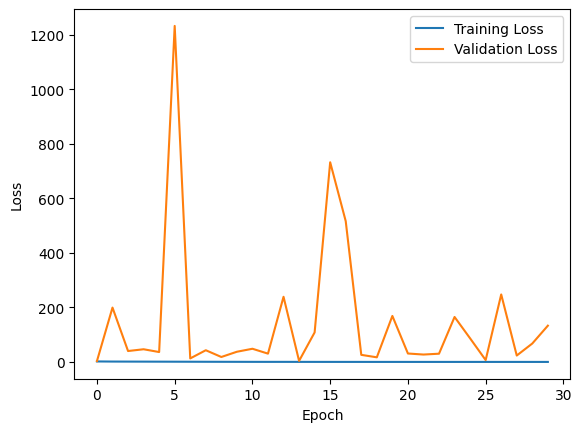

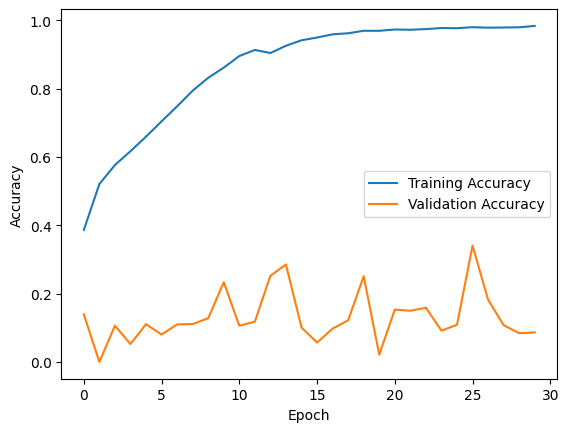

In [ ]:
# Visualizar las curvas de pérdida y precisión
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Insertar imagen como usuario

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
import cv2
from tensorflow.keras.models import load_model
import io

# Cargar el modelo previamente entrenado
model = load_model('modelo_entrenado.h5')

# Crear un diccionario que mapee los índices de clase a los nombres de los animales
class_names = {
    0: 'cane',
    1: 'cavallo',
    2: 'elefante',
    3: 'farfalla',
    4: 'gallina',
    5: 'gatto',
    6: 'mucca',
    7: 'pecora',
    8: 'ragno',
    9: 'scoiattolo'
    # Agrega más nombres de animales según tus clases
}
# Función para preprocesar la imagen cargada
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((100, 100))  # Redimensionar la imagen
    image = np.array(image) / 255.0  # Normalizar
    return image

# Función para realizar la predicción y obtener el nombre del animal
def predict_animal_name(image_path):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image.reshape(1, 100, 100, 3))
    predicted_class = np.argmax(prediction)
    animal_name = class_names.get(predicted_class, 'Clase Desconocida')
    return animal_name

# Manejar la carga de la imagen
def handle_image_upload(change):
    uploaded_image_data = change['new']
    if uploaded_image_data is not None:
        image_data = list(uploaded_image_data.values())[0]['content']
        uploaded_image = Image.open(io.BytesIO(image_data))
        uploaded_image_path = 'uploaded_image.jpg'
        uploaded_image.save(uploaded_image_path)
        animal_name = predict_animal_name(uploaded_image_path)
        print(f"El animal es: {animal_name}")
    else:
        print("No se ha cargado ninguna imagen.")

# Crear el widget de carga de imagen
image_upload = widgets.FileUpload(accept='image/*')
image_upload.observe(handle_image_upload, names='value')

# Mostrar el widget de carga de imagen
display(image_upload)

FileUpload(value={}, accept='image/*', description='Upload')

1/1 [==============================] - 0s 108ms/step
El animal es: farfalla


In [ ]:
type(uploaded_image)

dict

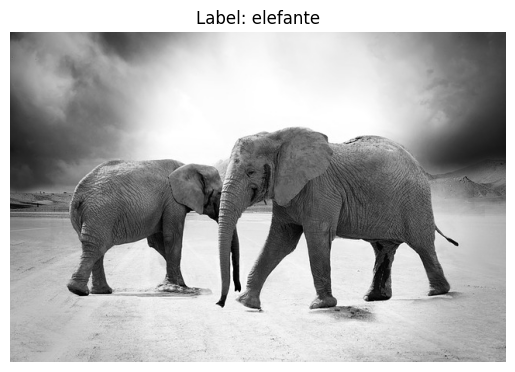

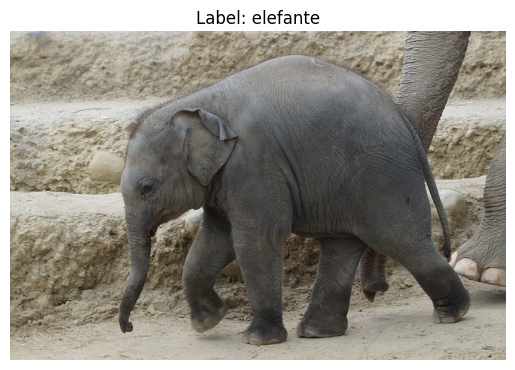

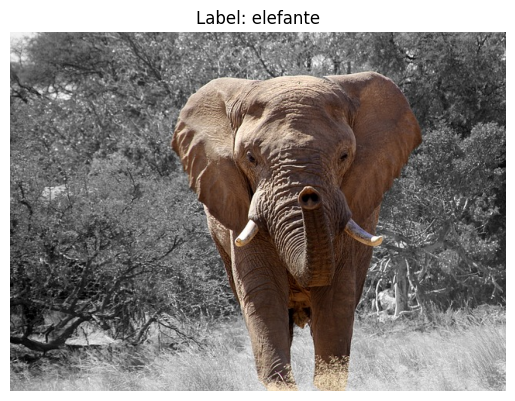

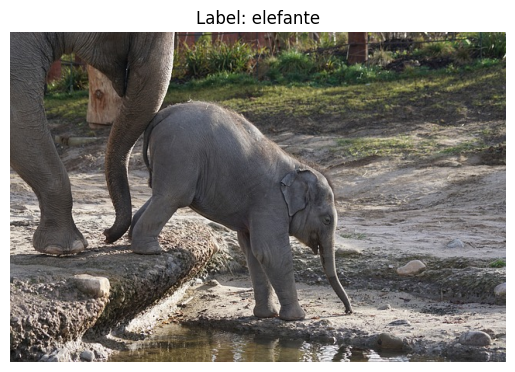

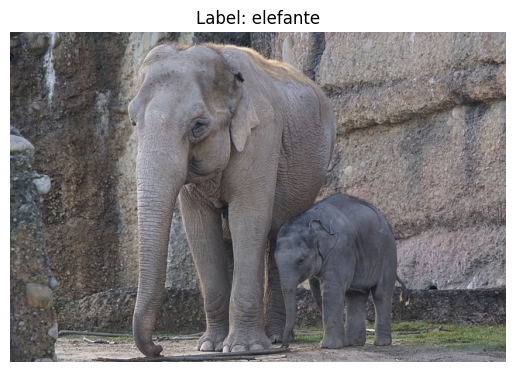

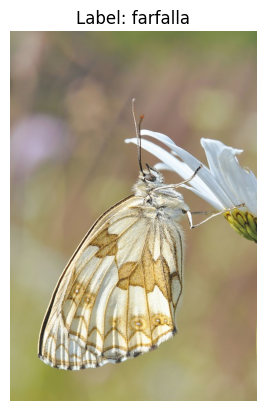

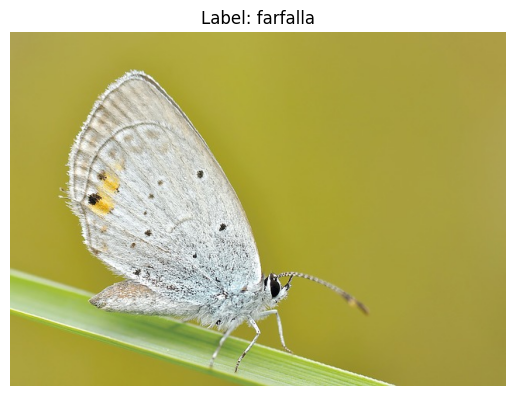

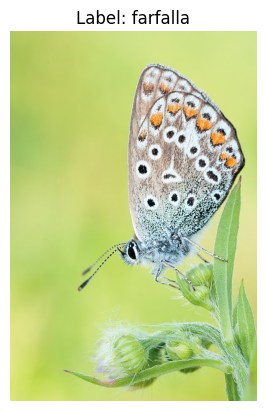

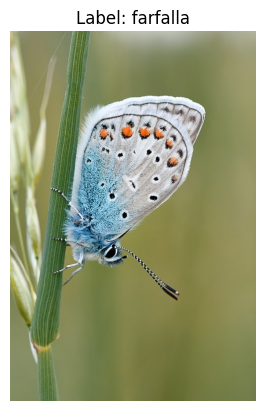

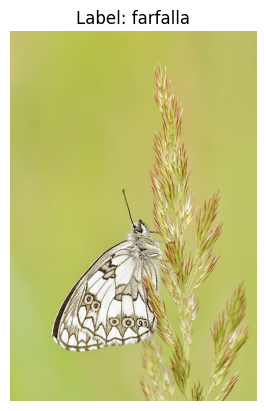

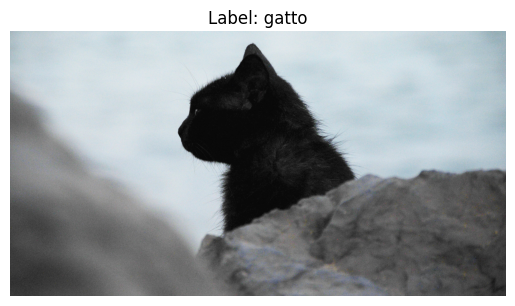

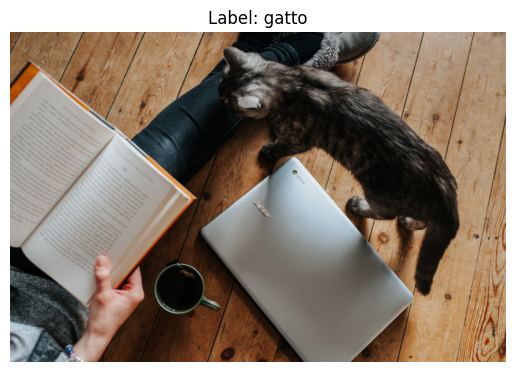

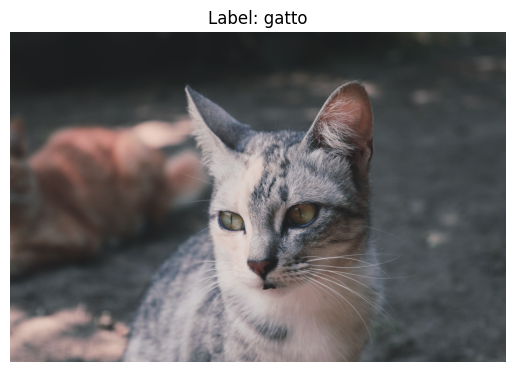

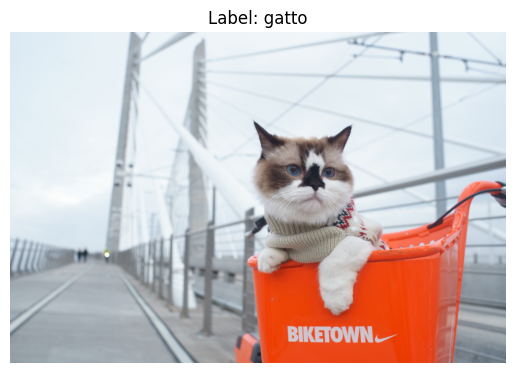

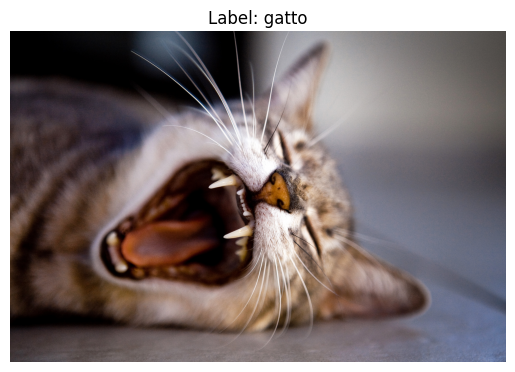

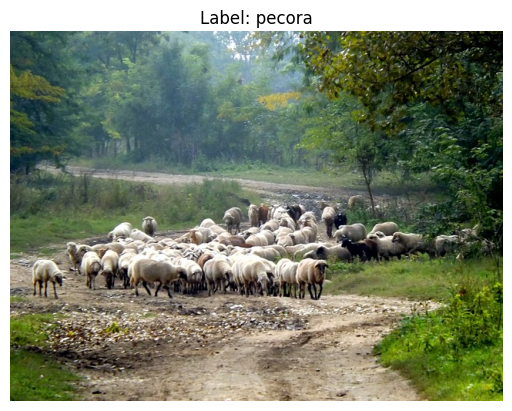

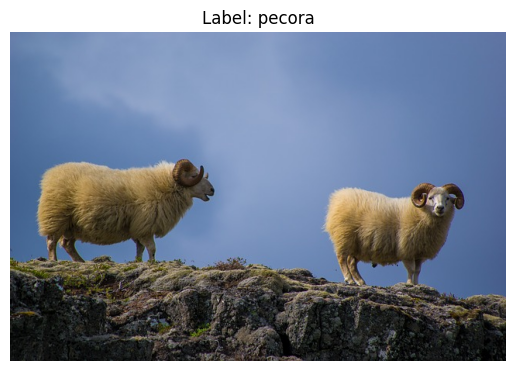

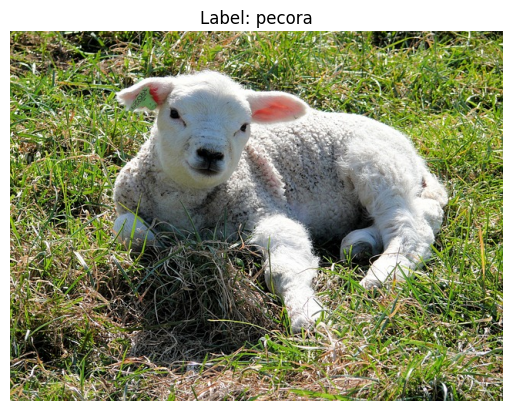

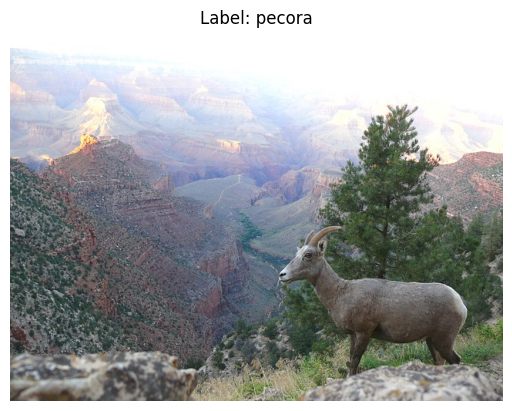

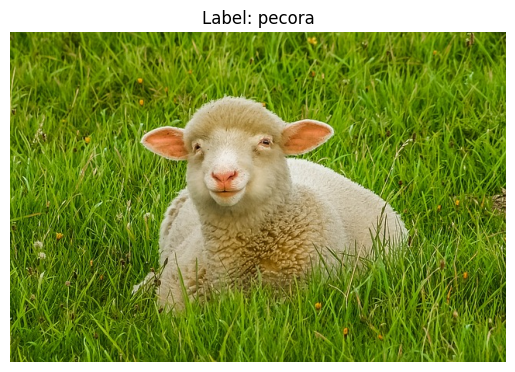

In [ ]:
import os

extract_dir2 = "/content/drive/MyDrive/Universidad/2024/Semestre 1/Inteligencia Artificial/animals10/raw-img"

# Obtener la lista de carpetas (nombre de los animales)
animal_folders = [folder for folder in os.listdir(extract_dir2) if os.path.isdir(os.path.join(extract_dir2, folder))]

# Visualizar algunas imágenes con sus etiquetas
num_images_to_display = 5
for animal_folder in animal_folders:
    animal_folder_path = os.path.join(extract_dir2, animal_folder)
    image_files = [filename for filename in os.listdir(animal_folder_path) if filename.endswith('.jpg')]
    for i in range(min(num_images_to_display, len(image_files))):
        image_path = os.path.join(animal_folder_path, image_files[i])
        label = animal_folder

        # Cargar y mostrar la imagen
        image = plt.imread(image_path)
        plt.imshow(image)
        plt.title(f"Label: {label}")
        plt.axis('off')
        plt.show()


## **Conclusiones y Recomendaciones**



*   Conclusiones
  * En este proyecto, se ha desarrollado y optimizado un modelo de clasificación de imágenes utilizando redes neuronales convolucionales (CNN) para identificar diferentes categorías de animales a partir de imágenes. Se implementaron diversas estrategias de mejora, incluyendo el ajuste de hiperparámetros, el preprocesamiento de datos, la regularización y la reducción del sobreajuste.
  * Durante el proceso de optimización, se exploraron diferentes configuraciones de hiperparámetros y arquitecturas de redes, así como técnicas de aumento de datos y regularización para mejorar el rendimiento del modelo. Se observó una mejora significativa en la precisión del modelo después de aplicar estas estrategias, lo que indica una mejor capacidad de generalización y una reducción del sobreajuste.
  * Además, se realizó un análisis detallado de las curvas de pérdida y precisión durante el entrenamiento y la validación del modelo, lo que proporcionó información valiosa sobre su rendimiento y capacidad de generalización. Se observó un buen equilibrio entre la precisión en el conjunto de entrenamiento y en el conjunto de validación, lo que sugiere que el modelo es capaz de generalizar bien a datos no vistos previamente.
*   Recomendaciones
  * Se recomienda, en caso de querer aumentar la Acurracy del Modelo, probar con otros ajustes de hiperparámetros, como por ejemplo el "Learning_rate". Esto puede otorgar una obtención de características más complejas de los datos.
  * Se puede considerar agregar más capas convolucionales o capas totalmente conectadas, o incluso utilizar arquitecturas predefinidas como VGG o ResNet. Estas arquitecturas podrían proporcionar una mayor capacidad para capturar la complejidad de los datos.
  * Se puede aumentar la regularización del modelo utilizando técnicas como la regularización L2, el aumento de la tasa de dropout, y la adición de más capas de BatchNormalization, para estabilizar y acelerar el entrenamiento.


##  **Ejemplos de Prueba del Modelo**

A continuación, se presenta un "print" para poder observar por pantalla los nombres de todos los animales que existen en el Dataset que se está utilizando.

In [ ]:
# Imprimir el contenido del directorio del conjunto de datos
print("==>", os.listdir(drive_dataset_dir))

NameError: name 'os' is not defined

La siguiente Función "show_images" es la encargada de mostrar imágenes correspondientes a cada una de las categorías existentes en el dataset.
Luego de ser definida, al ser llamada, entregará las correspondientes imágenes de Animales, como se ve a continuación:

In [ ]:
# Definir la función para mostrar algunas imágenes de ejemplo
def show_images(directory):
    categories = os.listdir(directory)
    for category in categories:
        path = os.path.join(directory, category)
        print(f"Mostrando algunas imágenes de la categoría: {category}")
        for img in os.listdir(path)[:3]:  # Mostrar solo las primeras 3 imágenes de cada categoría
            img_path = os.path.join(path, img)
            img_array = cv2.imread(img_path)
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
            plt.imshow(img_array)
            plt.title(category)
            plt.axis('off')
            plt.show()

In [ ]:
# Mostrar algunas imágenes de ejemplo
show_images(drive_dataset_dir)